In [47]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [48]:
# Load in excel file, divide up into separate dataframes
xls = pd.ExcelFile('./ch8.xlsx')
UF_Cavity = xls.parse(0)
Cavity_Cavity = xls.parse(1)
UF_UF = xls.parse(2)
Cavity_UF = xls.parse(3)
UFCavity_Cavity = xls.parse(4)

# Combine data into a list of data frames
all_data = [UF_Cavity, 
            Cavity_Cavity,
            UF_UF, 
            Cavity_UF,
           UFCavity_Cavity]
names = ["UF_Cavity", 
            "Cavity_Cavity",
            "UF_UF", 
            "Cavity_UF",
           "UFCavity_Cavity"]

In [49]:
# More descriptive column names
for df in all_data:
    df.columns = ['Test', 'Group', 'Threshold_Percentage',
              'AUROC', 'AUPR_0', 'AUPR',
              'True_Positive', 'False_Positive', 
              'True_Negative', 'False_Negative', 
              'True_Positive_Rate', 'True_Negative_Rate', 
              'Positive_Predictive_Value', 'Negative_Predictive_Value', 
              'False_Negative_Rate', 'False_Positive_Rate',
              'False_Discovery_Rate', 'False_Omission_Rate', 
              'Accuracy', 'F1',
              'Matthews_Correlation_Coefficient'
             ]

In [50]:
labels=UF_UF.columns.values[3:]
labels

array(['AUROC', 'AUPR_0', 'AUPR', 'True_Positive', 'False_Positive',
       'True_Negative', 'False_Negative', 'True_Positive_Rate',
       'True_Negative_Rate', 'Positive_Predictive_Value',
       'Negative_Predictive_Value', 'False_Negative_Rate',
       'False_Positive_Rate', 'False_Discovery_Rate',
       'False_Omission_Rate', 'Accuracy', 'F1',
       'Matthews_Correlation_Coefficient'], dtype=object)

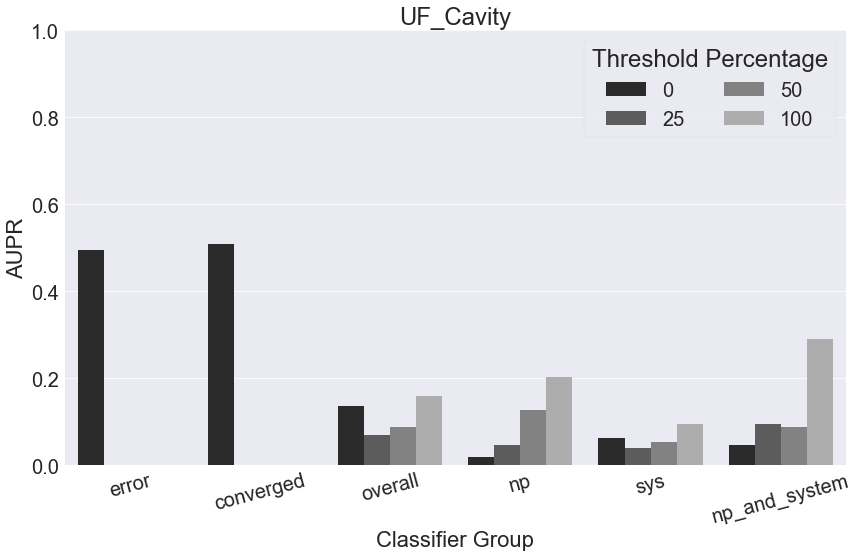

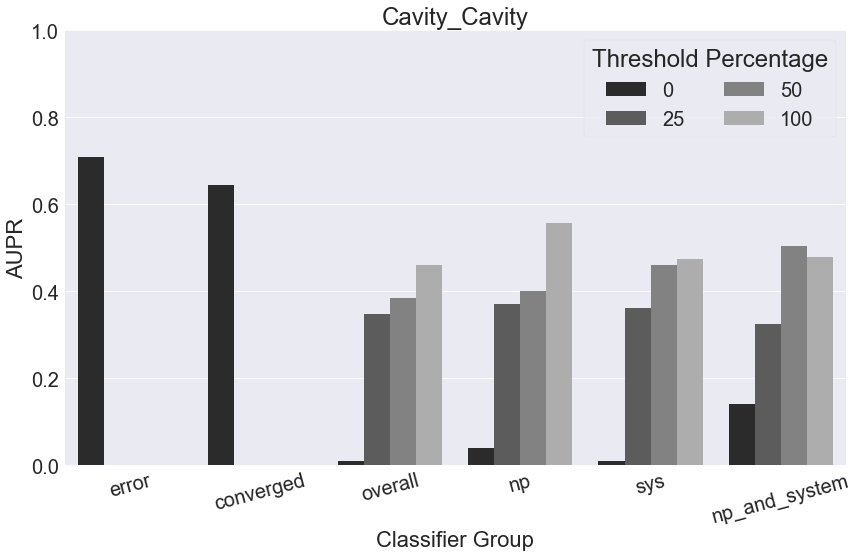

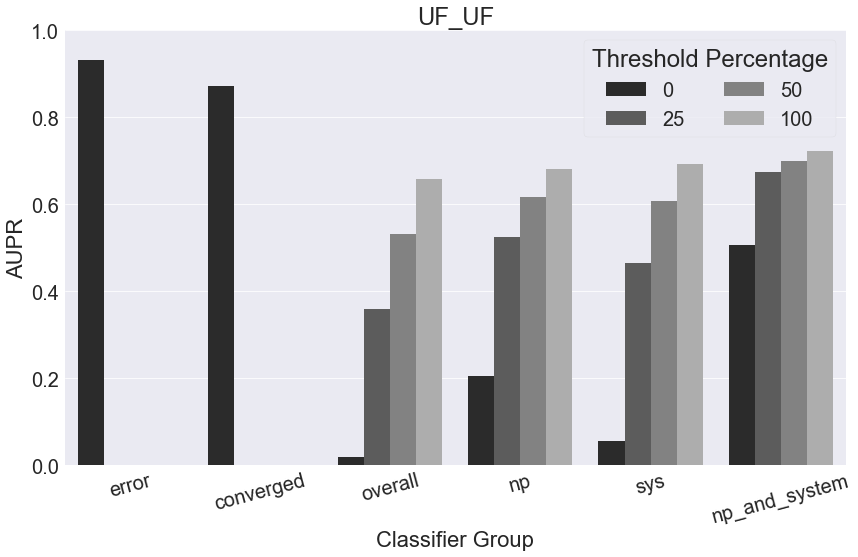

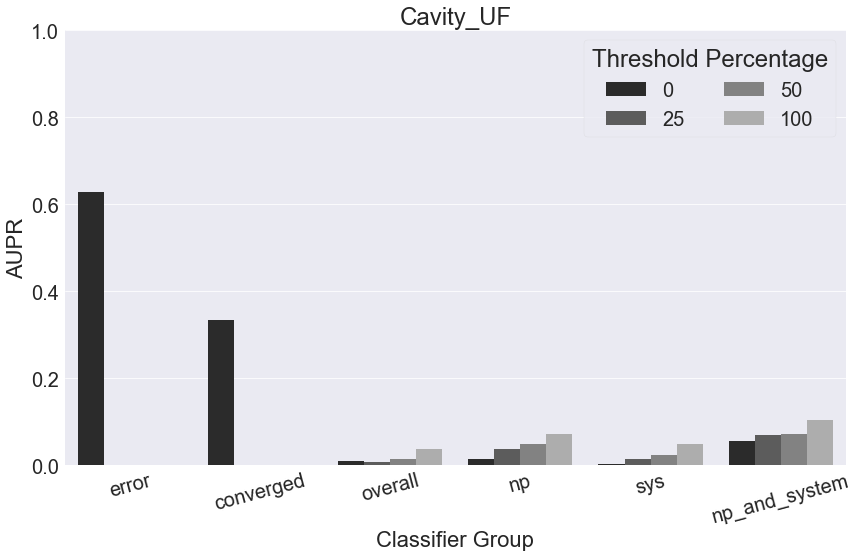

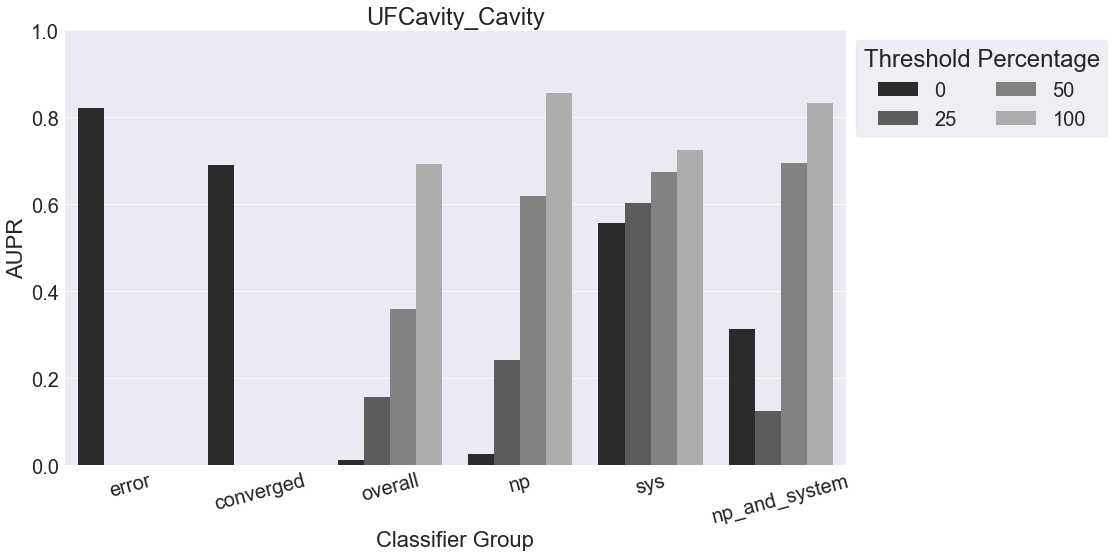

In [57]:
# Compare AUROC results for all 18 labels
#     based on their groupings
label = 'AUPR'
i = 0
for df in all_data:
    plt.figure(figsize=(14,8))
    auroc_ax = sns.barplot(x='Group', y=label, 
                           hue='Threshold_Percentage', data=df)
    auroc_ax.set(ylabel=label)
    auroc_ax.set(xlabel="Classifier Group")
    auroc_ax.legend(ncol=2, loc=0, bbox_to_anchor=(1.0, 1), frameon=True, title="Threshold Percentage")
    auroc_ax.set(title=names[i])
    auroc_ax.set(ylim=(0, 1))
    i+=1
    plt.xticks(rotation=15)
    plt.show()

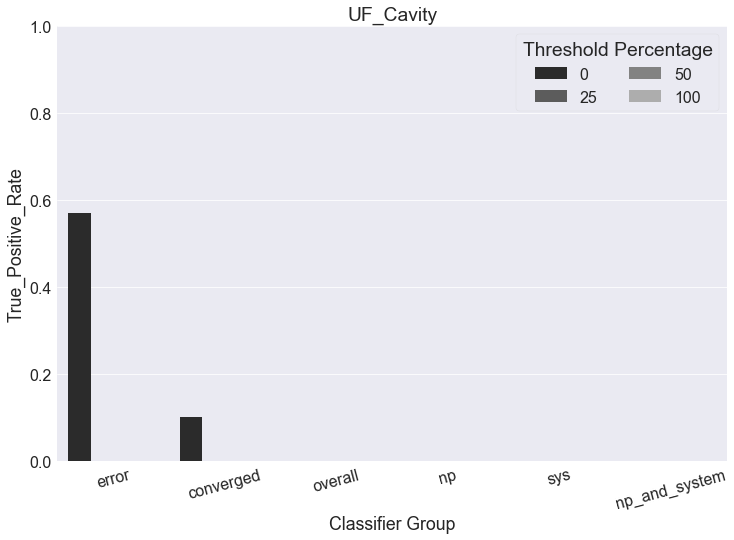

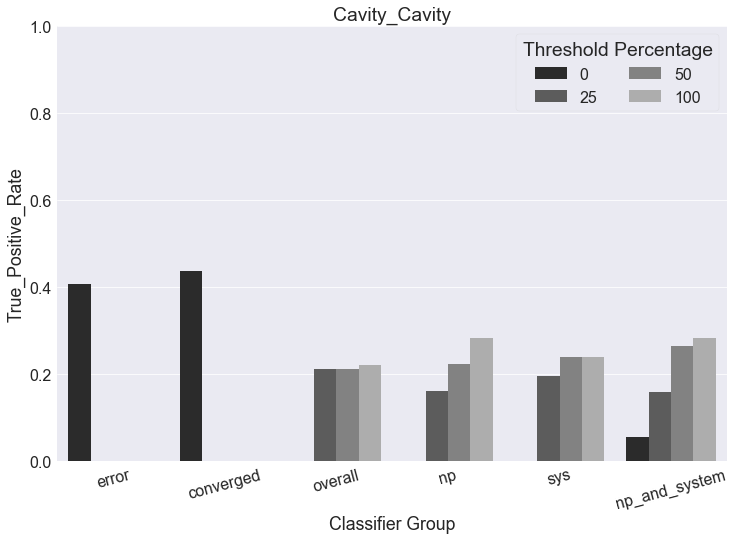

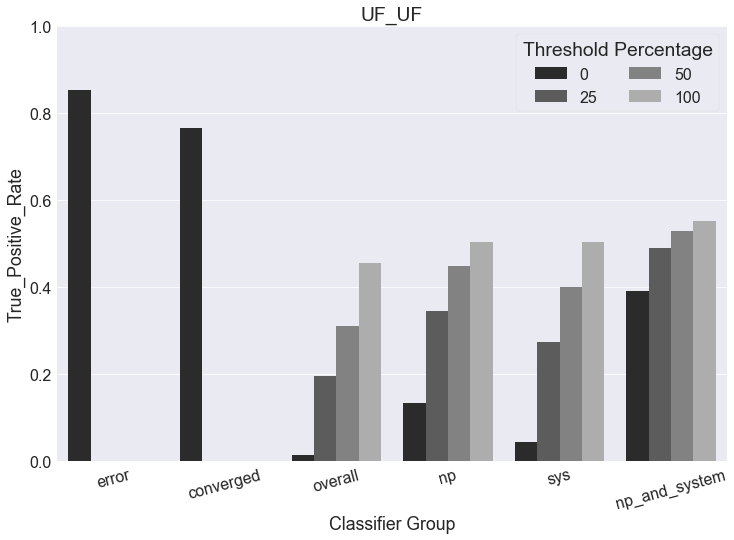

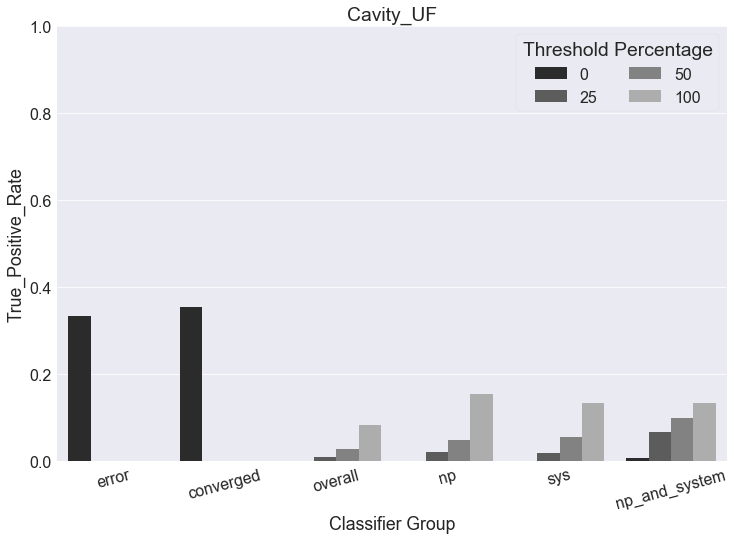

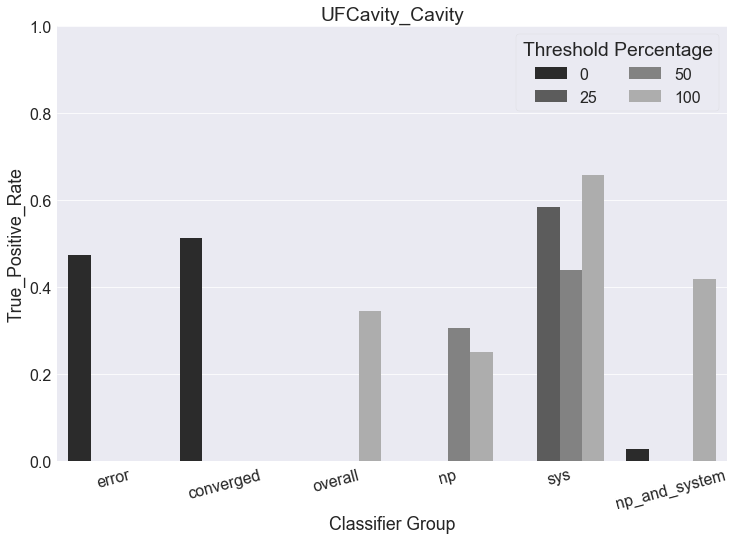

In [52]:
# Compare TPR results for all 18 labels
#     based on their groupings
label = 'True_Positive_Rate'
sns.set_context("paper", font_scale=2)
sns.set_palette("Greys_r")
i = 0
for df in all_data:
    plt.figure(figsize=(12,8))
    auroc_ax = sns.barplot(x='Group', y=label, 
                           hue='Threshold_Percentage', data=df)
    auroc_ax.set(ylabel=label)
    auroc_ax.set(xlabel="Classifier Group")
    auroc_ax.legend(ncol=2, loc=0, frameon=True, title="Threshold Percentage")
    auroc_ax.set(title=names[i])
    auroc_ax.set(ylim=(0, 1))
    i+=1
    plt.xticks(rotation=15)
    plt.show()

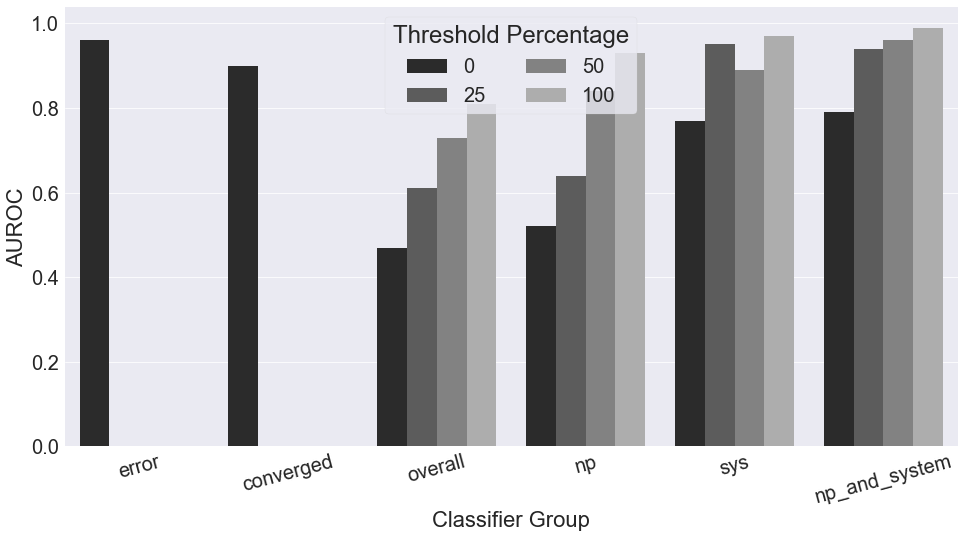

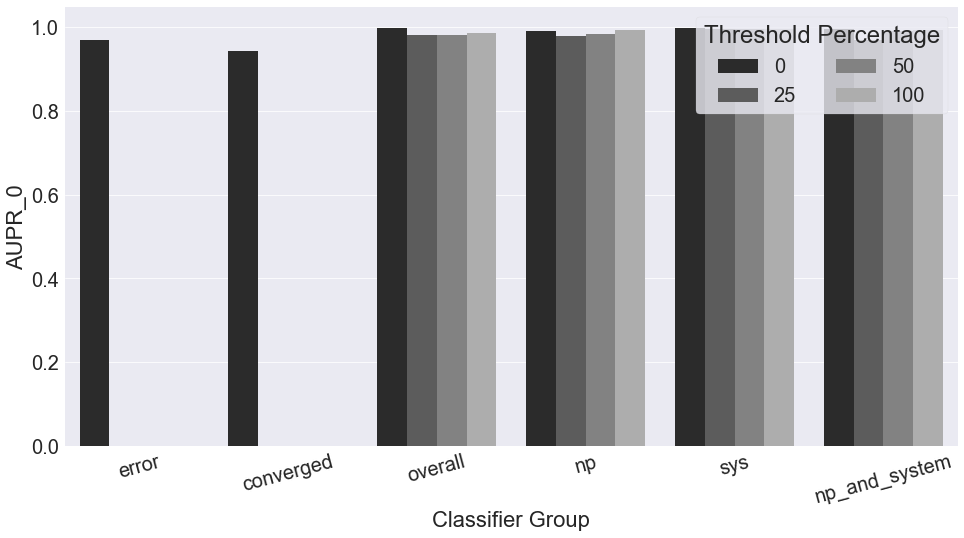

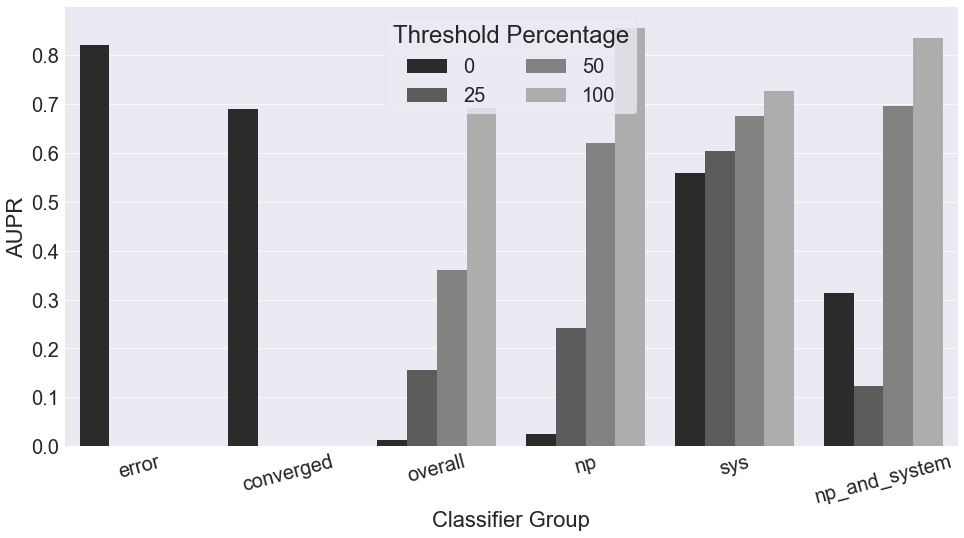

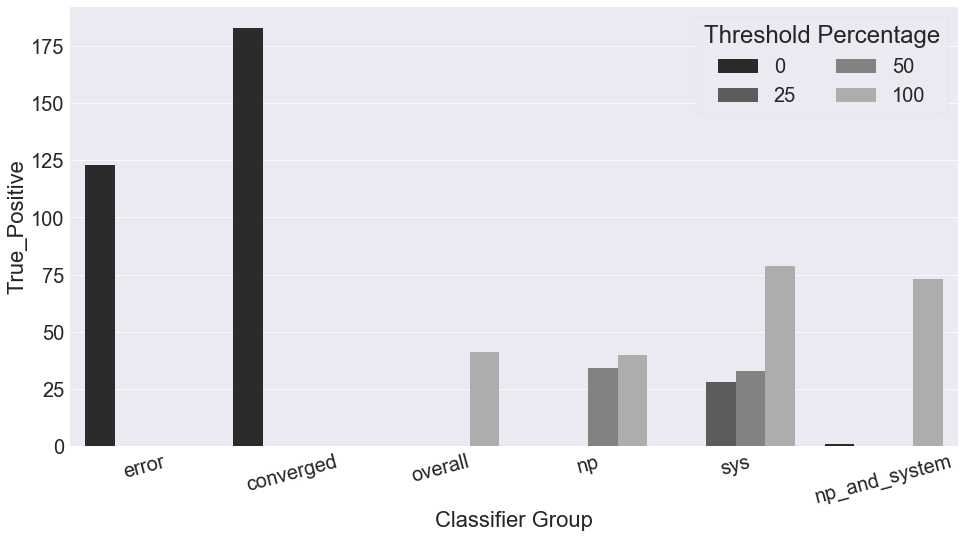

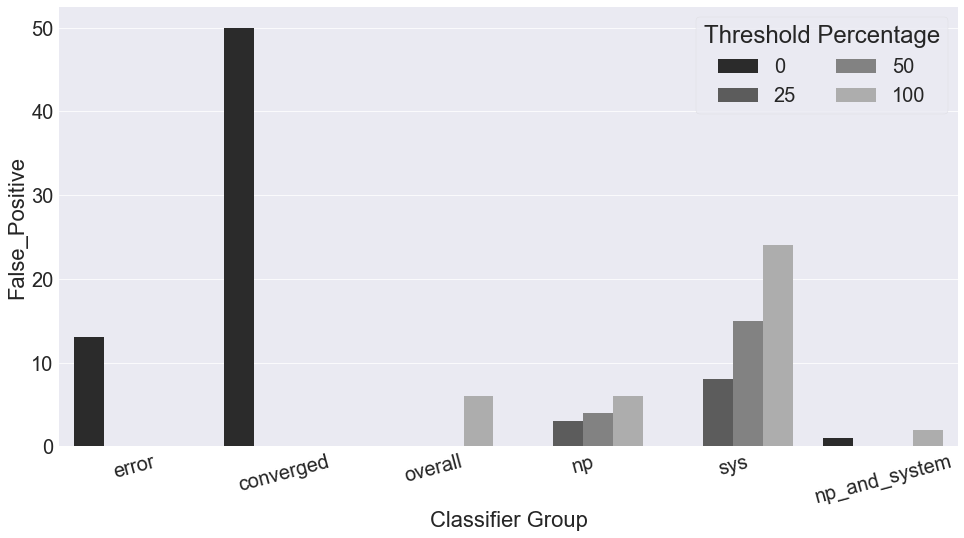

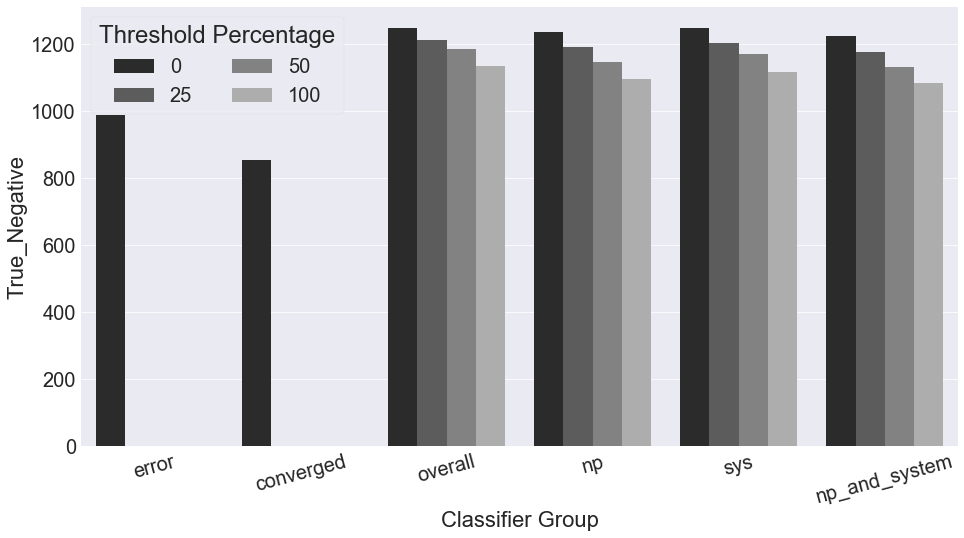

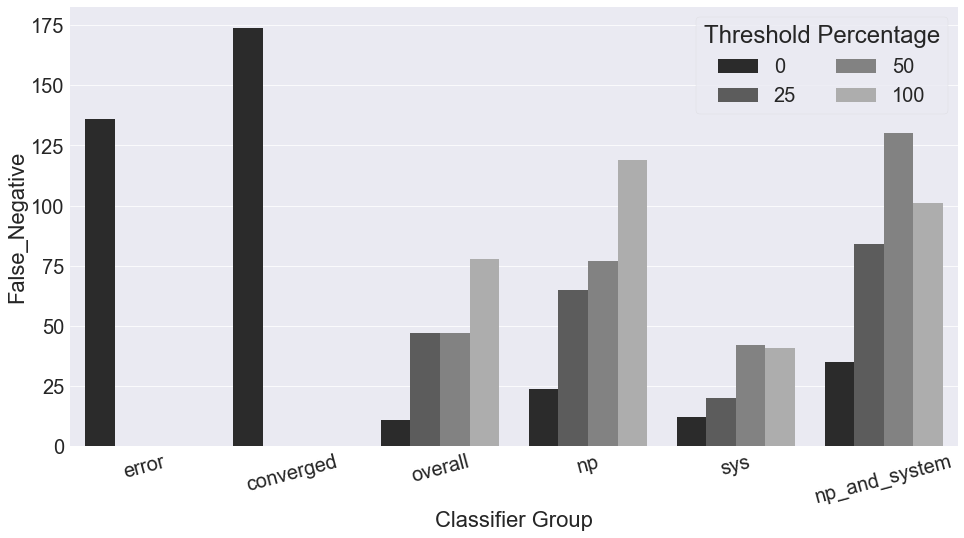

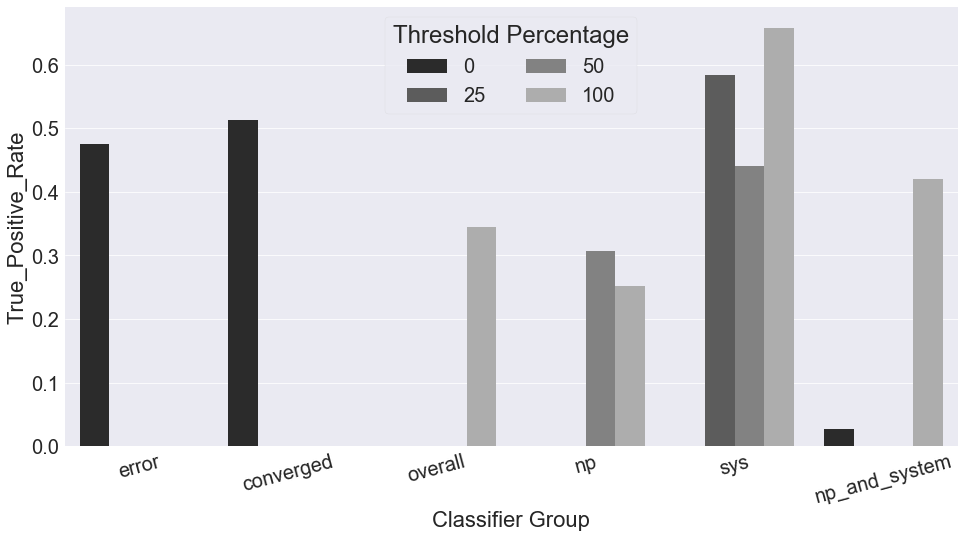

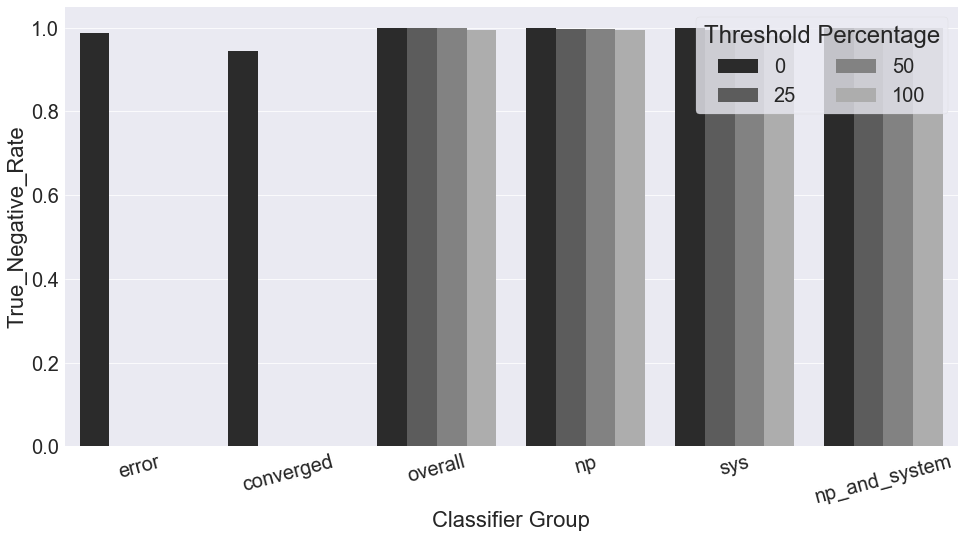

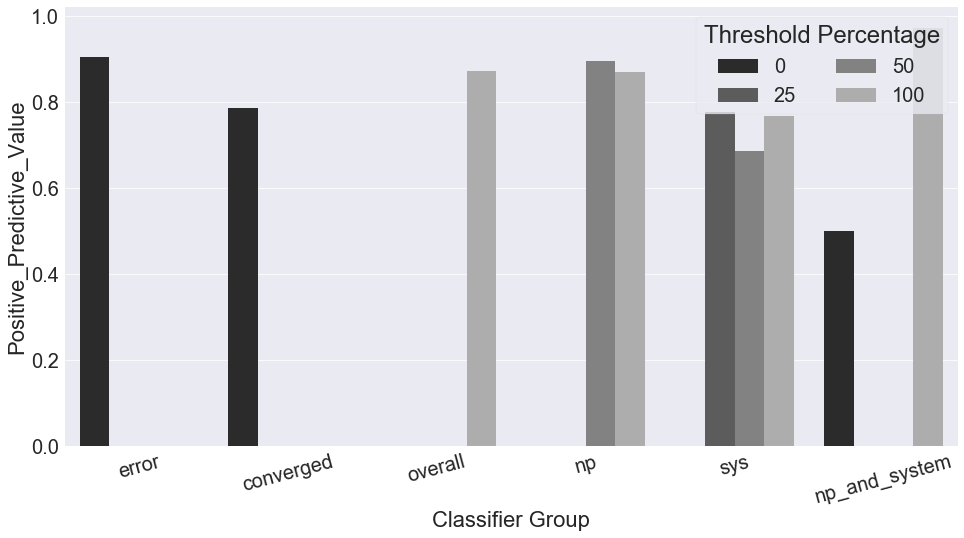

KeyboardInterrupt: 

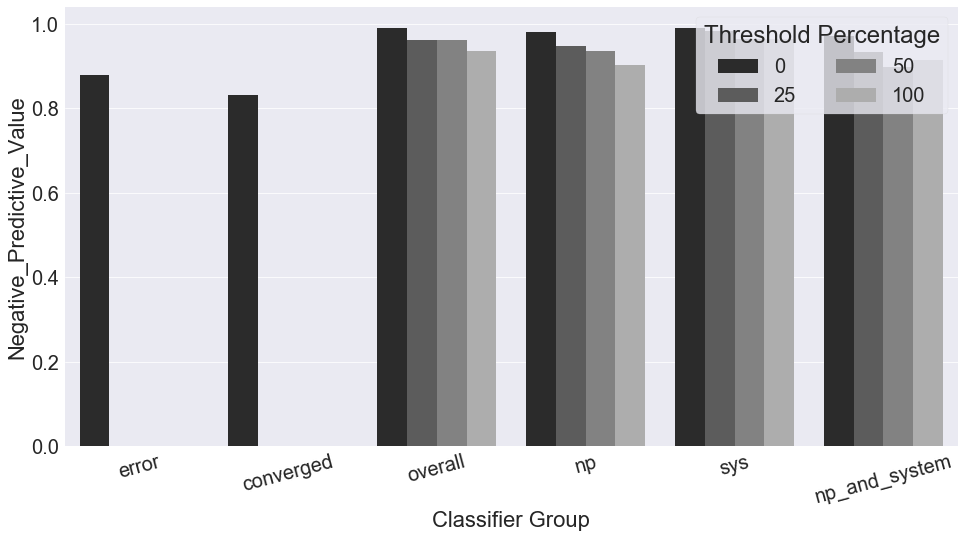

In [53]:
# Compare TPR results for all 18 labels
#     based on their groupings
for lbl in labels:
    label = lbl
    sns.set_context("paper", font_scale=2.5)
    sns.set_palette("Greys_r", 6)
    plt.figure(figsize=(14,8))
    auroc_ax = sns.barplot(x='Group', y=label, 
                           hue='Threshold_Percentage', data=df)
    auroc_ax.set(ylabel=label)
    auroc_ax.set(xlabel="Classifier Group")
    auroc_ax.legend(ncol=2, bbox_to_anchor=(1.05, 1),loc=0, frameon=True, title="Threshold Percentage")
    #lgd = auroc_ax.legend(ncol=2, bbox_to_anchor=(1.05, 1),loc=0, frameon=True, title="Threshold Percentage")
    lgd = auroc_ax.legend(ncol=2, loc=0,frameon=True, title="Threshold Percentage")
    plt.xticks(rotation=15)
    plt.tight_layout()
    
    plt.savefig(label + '.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()
    